## Import Necessary Libraries

In [1]:
import pandas as pd
import os

import model_metrics

print(model_metrics.__version__)

from model_tuner import loadObjects

from eda_toolkit import ensure_directory
from model_metrics import (
    summarize_model_performance,
    show_calibration_curve,
    show_confusion_matrix,
    show_roc_curve,
    show_pr_curve,
    show_lift_chart,
    show_gain_chart,
    show_ks_curve,
)

0.0.2a


## Set Model Path

In [2]:
print(f"Model Metrics version: {model_metrics.__version__}")
print(f"Model Metrics authors: {model_metrics.__author__} \n")

## Define base paths
## `base_path`` represents the parent directory of your current working directory
base_path = os.path.join(os.pardir)
## Go up one level from 'notebooks' to the parent directory, then into the
## 'results' folder

model_path = os.path.join(os.pardir, "model_files/single_model_classification_results")
image_path_png = os.path.join(model_path, "images", "png_images")
image_path_svg = os.path.join(model_path, "images", "svg_images")

# Use the function to ensure the 'data' directory exists
ensure_directory(model_path)
ensure_directory(image_path_png)
ensure_directory(image_path_svg)

Model Metrics version: 0.0.2a
Model Metrics authors: Leonid Shpaner 

Directory exists: ../model_files/single_model_classification_results
Directory exists: ../model_files/single_model_classification_results/images/png_images
Directory exists: ../model_files/single_model_classification_results/images/svg_images


## Load The Model Object and Test Data

In [3]:
model = loadObjects(os.path.join(model_path, "logistic_regression_model.pkl"))

X_test = pd.read_parquet(os.path.join(model_path, "X_test.parquet"))
y_test = pd.read_parquet(os.path.join(model_path, "y_test.parquet"))

X_valid = pd.read_parquet(os.path.join(model_path, "X_valid.parquet"))
y_valid = pd.read_parquet(os.path.join(model_path, "y_valid.parquet"))

Object loaded!


## Set The Desired Naming Conventions

In [4]:
pipelines_or_models = [
    model,
]

# Model titles
model_titles = [
    "Logistic Regression",
]

## Summarize Model Performance

Processing Model: Logistic Regression
Logistic Regression: Kolmogorov-Smirnov Statistic = 0.5323499337, p < 0.01


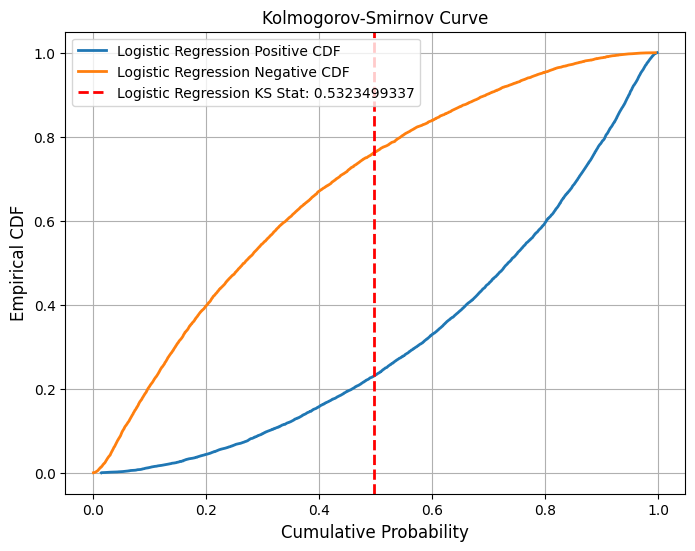

In [5]:
# Example: Running KS Curve with a trained model
show_ks_curve(
    model=pipelines_or_models,  # Your trained model object
    model_titles=model_titles,
    X=X_test,  # Test dataset
    y=y_test,  # True labels
    title="Kolmogorov-Smirnov Curve",
    save_plot=False,
    text_wrap=50,
    curve_kwgs={"linewidth": 2},
    linestyle_kwgs={"color": "red", "linestyle": "--", "linewidth": 2},
    figsize=(8, 6),
    label_fontsize=12,
    tick_fontsize=10,
    gridlines=True,
    decimal_places=10,
)

In [6]:
model_summary = summarize_model_performance(
    model=pipelines_or_models,
    X=X_test,
    y=y_test,
    model_type="classification",
    model_titles=model_titles,
    # model_threshold=thresholdas,
    return_df=True,
    # overall_only=True,
    # custom_threshold=0.7,
    # decimal_places=2,
)

model_summary

,Metrics,Logistic Regression
,Precision/PPV,0.763
,Average Precision,0.842
,Sensitivity/Recall,0.767
,Specificity,0.764
,F1-Score,0.765
,AUC ROC,0.846
,Brier Score,0.16
,Model Threshold,0.5


## Plot The Calibration Curve

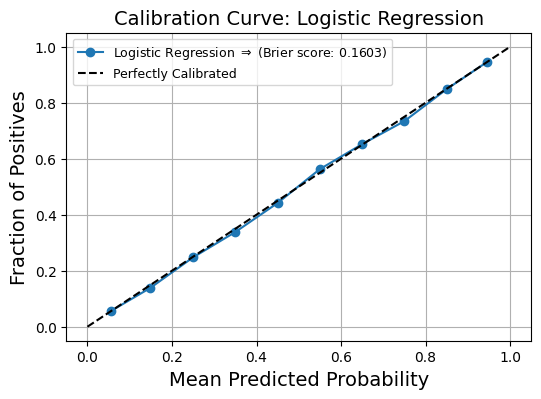

In [7]:
# Plot calibration curves in overlay mode
show_calibration_curve(
    model=pipelines_or_models,
    X=X_test,
    y=y_test,
    model_titles=model_titles,
    overlay=False,
    # title="Calibration Curves",
    text_wrap=40,
    figsize=(6, 4),
    label_fontsize=14,
    tick_fontsize=9,
    bins=10,
    show_brier_score=True,
    # grid=True,
    # gridlines=False,
    linestyle_kwgs={"color": "black"},
)

## Plot The Confusion Matrix

Confusion Matrix for Logistic Regression: 

          Predicted 0  Predicted 1
Actual 0         7481         2406
Actual 1         2416         7697

Classification Report for Logistic Regression: 

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      9887
           1       0.76      0.76      0.76     10113

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000



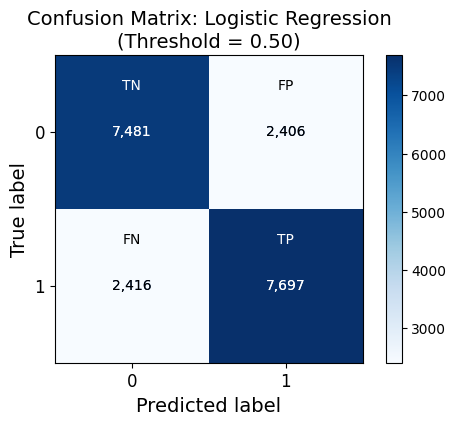

In [8]:
show_confusion_matrix(
    model=pipelines_or_models,
    X=X_valid,
    y=y_valid,
    model_titles=model_titles,
    cmap="Blues",
    text_wrap=40,
    # title="Custom",
    save_plot=True,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    grid=False,
    # n_cols=3,
    # n_rows=1,
    figsize=(6, 4),
    show_colorbar=True,
    label_fontsize=14,
    tick_fontsize=12,
    inner_fontsize=10,
    class_report=True,
    # custom_threshold=0.5,
    # labels=False,
)

## Plot ROC AUC Curve

AUC for Logistic Regression: 0.846


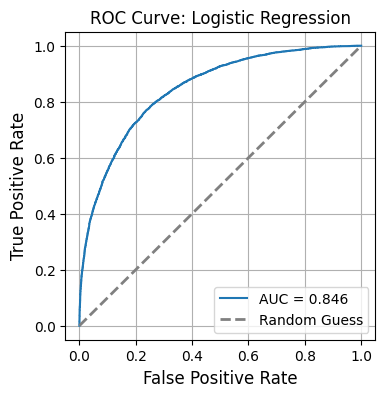

In [9]:
# Plot ROC curves
show_roc_curve(
    model=pipelines_or_models,
    X=X_test,
    y=y_test,
    overlay=False,
    # title="Custom",
    title=None,
    model_titles=model_titles,
    decimal_places=3,
    n_cols=3,
    # n_rows=1,
    # curve_kwgs={
    #     "Logistic Regression": {"color": "blue", "linewidth": 2},
    #     "SVM": {"color": "red", "linestyle": "--", "linewidth": 1.5},
    # },
    # linestyle_kwgs={"color": "grey", "linestyle": "--"},
    save_plot=True,
    grid=False,
    figsize=(4, 4),
    # label_fontsize=16,
    # tick_fontsize=16,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    # gridlines=False,
)

## Precision-Recall Curve

Average Precision for Logistic Regression: 0.842


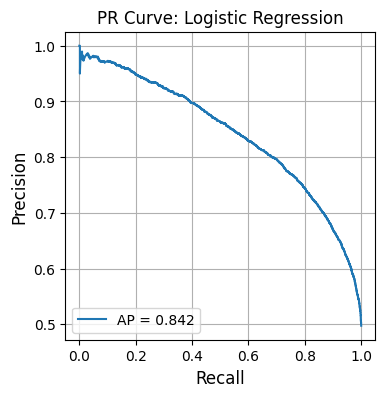

In [10]:
show_pr_curve(
    model=pipelines_or_models,
    X=X_test,
    y=y_test,
    # x_label="Hello",
    model_titles=model_titles,
    decimal_places=3,
    # title="Custom",
    overlay=False,
    grid=False,
    save_plot=True,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    figsize=(4, 4),
    # tick_fontsize=16,
    # label_fontsize=16,
    # grid=True,
    # gridlines=False,
)

## Lift Chart

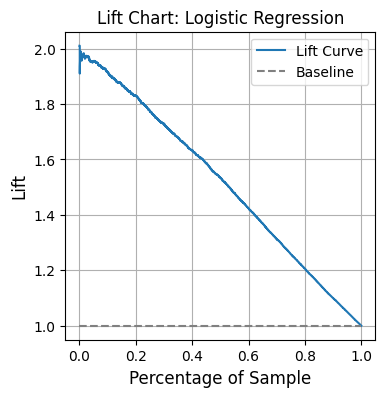

In [11]:
# Plot Lift chart
show_lift_chart(
    model=pipelines_or_models,
    X=X_test,
    y=y_test,
    overlay=False,
    # title="Custom",
    model_titles=model_titles,
    save_plot=True,
    # curve_kwgs={
    #     "Logistic Regression": {"color": "blue", "linewidth": 2},
    #     # "SVM": {"color": "red", "linestyle": "--", "linewidth": 1.5},
    # },
    linestyle_kwgs={"color": "grey", "linestyle": "--"},
    grid=False,
    figsize=(4, 4),
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
)

## Gain Chart

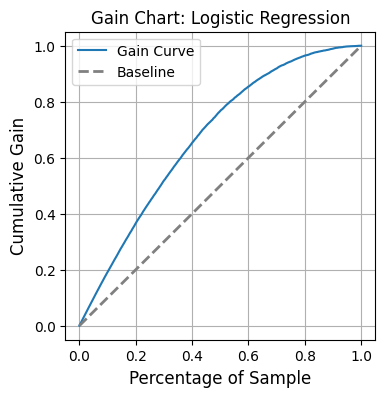

In [12]:
# Plot Gain chart
show_gain_chart(
    model=pipelines_or_models,
    X=X_test,
    y=y_test,
    overlay=False,
    # title="Custom",
    model_titles=model_titles,
    # curve_kwgs={
    #     "Logistic Regression": {"color": "blue", "linewidth": 2},
    #     # "SVM": {"color": "red", "linestyle": "--", "linewidth": 1.5},
    # },
    # linestyle_kwgs={"color": "black", "linestyle": "-"},
    save_plot=True,
    grid=False,
    figsize=(4, 4),
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
)